In [3]:
import pandas as pd

In [4]:
import glob
pattern = 'ATM_*.XLSX'
excel_files = glob.glob(pattern)
POS_months = list(map(lambda x: x[4:10], excel_files))

In [5]:
print(excel_files)

['ATM_Apr_16.xlsx', 'ATM_Apr_17.XLSX', 'ATM_Aug_16.xlsx', 'ATM_Aug_17.XLSX', 'ATM_Dec_16.XLSX', 'ATM_Dec_17.XLSX', 'ATM_Feb_16.xlsx', 'ATM_Feb_17.XLSX', 'ATM_Jan_16.xlsx', 'ATM_Jan_17.xlsx', 'ATM_Jul_16.xlsx', 'ATM_Jul_17.XLSX', 'ATM_Jun_16.xlsx', 'ATM_Jun_17.XLSX', 'ATM_Mar_16.xlsx', 'ATM_Mar_17.XLSX', 'ATM_May_16.xlsx', 'ATM_May_17.XLSX', 'ATM_Nov_16.XLSX', 'ATM_Nov_17.XLSX', 'ATM_Oct_16.xlsx', 'ATM_Oct_17.XLSX', 'ATM_Sep_16.xlsx', 'ATM_Sep_17.XLSX']


In [7]:
frame = []
i = 0
for excel in excel_files:
     df= pd.read_excel(excel, skiprows = 5)
     del df['Unnamed: 0']
     df.dropna(inplace = True)
        #creating a list of column names and index to subset.
     index = ['Unnamed: 2', 3, 4, 7, 9, 12, 14]
     index_colnames = ["Bank_name", "POS_online", "POS_offline", "NO_of.transc.credit",\
                  "amount_transc.credit", "NO_of.transc.debit", "amount_transc.debit"]
     df_new= df[index]
     df_new.columns = index_colnames
     df_new['month_year'] = POS_months[i]
     frame.append(df_new)
     i = i + 1
final_ATM = pd.concat(frame)
final_ATM.shape

C:\Users\Jignesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


(1283, 8)

In [8]:
import calendar
months_16 = []
months_17 = []

for name in calendar.month_abbr:
    months_16.append(name + "_16")
    months_17.append(name + "_17")
del months_16[0]
del months_17[0]
month_all = months_16 + months_17



In [9]:
from pandas.api.types import CategoricalDtype
month_order = CategoricalDtype(categories = month_all, ordered = True)
final_ATM['month_year'] = final_ATM['month_year'].astype(month_order)

In [10]:
final_ATM.sort_values(by = 'month_year', inplace = True)

In [11]:
final_ATM.head()

,Bank_name,POS_online,POS_offline,NO_of.transc.credit,amount_transc.credit,NO_of.transc.debit,amount_transc.debit,month_year
1,ANDHRA BANK,2710.0,0.0,214159.0,511.100000,1338812.0,1340.800000,Jan_16
26,AXIS BANK LTD,258030.0,0.0,5382668.0,18755.763393,8274094.0,12454.177807,Jan_16
25,STATE BANK OF TRAVANCORE,3451.0,0.0,0.0,0.000000,975907.0,1381.324567,Jan_16
24,STATE BANK OF PATIALA,4797.0,0.0,0.0,0.000000,508587.0,641.590989,Jan_16
23,STATE BANK OF MYSORE,5226.0,0.0,0.0,0.000000,524643.0,866.253733,Jan_16


In [12]:
online_POS = final_ATM.groupby('month_year')[['amount_transc.debit']].mean()

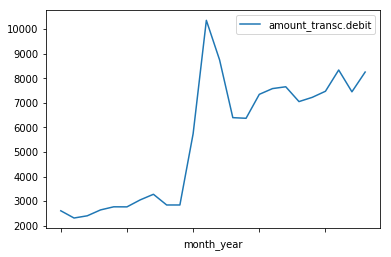

In [15]:
online_POS.plot.line()

In [ ]:
# As we can see here how the amount of transaction using debit card has increased abrutly which is after demonetization. 